       age  workclass  fnlwgt     education  educational-num  \
0       25    Private  226802          11th                7   
1       38    Private   89814       HS-grad                9   
2       28  Local-gov  336951    Assoc-acdm               12   
6       29          ?  227026       HS-grad                9   
8       24    Private  369667  Some-college               10   
...    ...        ...     ...           ...              ...   
48835   53    Private  321865       Masters               14   
48836   22    Private  310152  Some-college               10   
48837   27    Private  257302    Assoc-acdm               12   
48838   40    Private  154374       HS-grad                9   
48839   58    Private  151910       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing        Husband  White    Male 

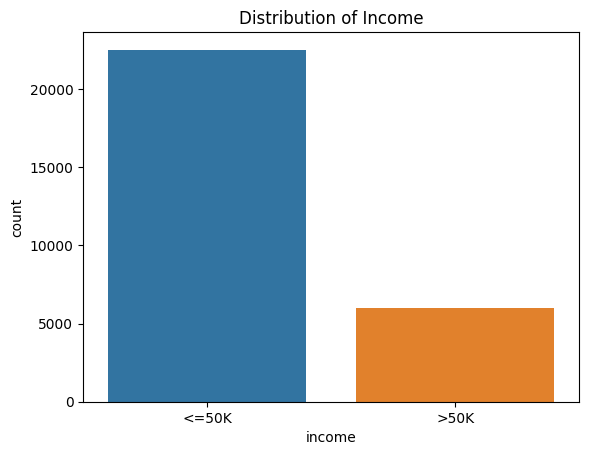

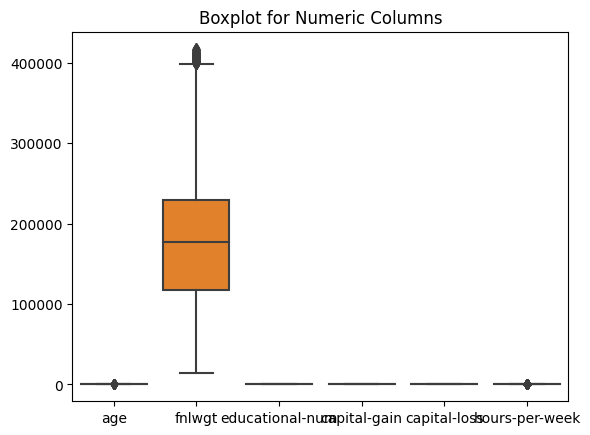

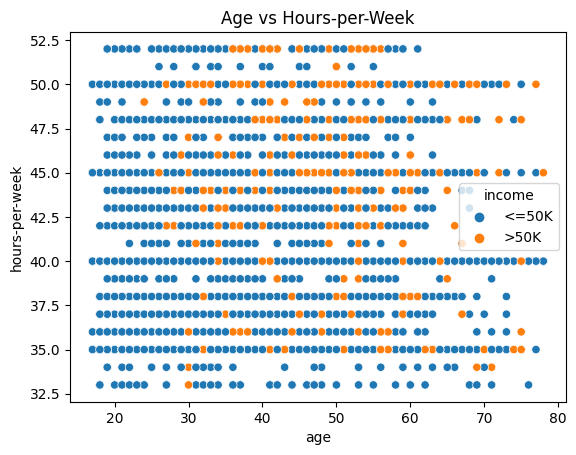

Prediction: <=50K
Actual: <=50K
Test accuracy: 0.83
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4503
        >50K       0.63      0.52      0.57      1202

    accuracy                           0.83      5705
   macro avg       0.75      0.72      0.73      5705
weighted avg       0.82      0.83      0.83      5705



In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('adult.csv')

# Handling the missing values
data = data.dropna()

duplicate_rows = data[data.duplicated()]
#print(duplicate_rows)

# Handling the duplicate value in the dataset
data = data.drop_duplicates()

# Handle the outliers
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numeric_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    data = data[(data[col] >= lower_limit) & (data[col] <= upper_limit)]
    
# Print cleaned dataset after handle missing and duplicate values
print(data)

# Visualize the distribution of the target variable
sns.countplot(x='income', data=data)
plt.title('Distribution of Income')
plt.show()

# Split the dataset into features and target
X = data.drop('income', axis=1)
y = data['income']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a ColumnTransformer to handle categorical features
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Preprocess the features using ColumnTransformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Create a boxplot for all numeric columns
sns.boxplot(data=data.select_dtypes(include=['int64', 'float64']))
plt.title('Boxplot for Numeric Columns')
plt.show()

# Add a scatter plot of 'age' vs 'hours-per-week' colored by 'income'
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=data)
plt.title('Age vs Hours-per-Week')
plt.show()

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Select a random record from the test set
index = np.random.randint(X_test.shape[0])
X_test_single = X_test[index]
y_test_single = y_test.iloc[index]

# Use the model to make a prediction for the selected record
y_pred_single = model.predict(X_test_single.toarray())[0]

# Display the prediction and actual value for the selected record
print(f'Prediction: {y_pred_single}')
print(f'Actual: {y_test_single}')

print(f'Test accuracy: {accuracy:.2f}')

# Evaluate the model's precision, recall, and f1-score
report = classification_report(y_test, y_pred)
print(report)